<a href="https://colab.research.google.com/github/Abhishek-Ganore/codsoft/blob/main/Copy_of_titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Corrected the class name
from sklearn.metrics import accuracy_score  # Corrected 'metrices' to 'metrics'
r̥r̥r̥r̥
# Example dataset creation
# For demonstration, let's create a simple synthetic dataset
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Visualize feature importance (coefficients)
coefficients = model.coef_[0]
features = df.drop('target', axis=1).columns

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


ImportError: cannot import name 'logisticRegression' from 'sklearn.linear_model' (/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/__init__.py)

Data collection/loading and processing

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#remove missing/null values
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
#replacing missing valueswith mean number
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

KeyError: 'age'

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#how many survives?
# Check if 'Survived' column exists
if 'Survived' in titanic_data.columns:
    survived_counts = titanic_data['Survived'].value_counts()
    print(survived_counts)
else:
    print("Column 'Survived' not found in the DataFrame.")
    # Check for other potential column names like 'survived', 'Survival', etc.
    print("Available columns:", titanic_data.columns)

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
#visual90izing data
sns.set

<Axes: xlabel='Survived', ylabel='count'>

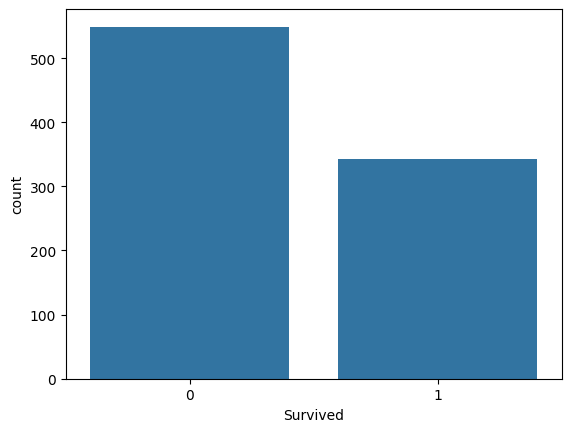

In [ ]:
# Change 'survived' to 'Survived' in your countplot call
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts() # Change 'sex' to 'Sex'

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

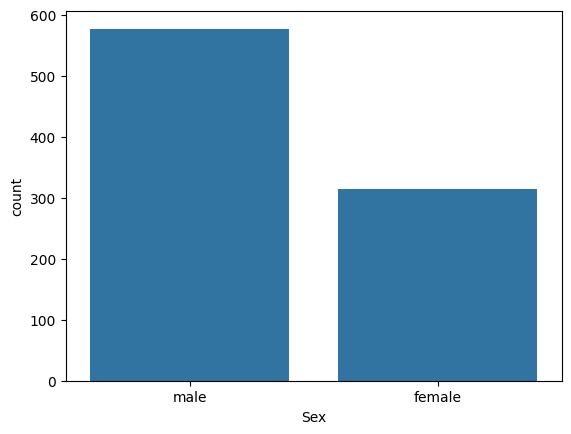

In [ ]:
#count plot for "sex" column
sns.countplot(x='Sex', data=titanic_data)  # Change 'sex' to 'Sex'

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sex', ylabel='count'>

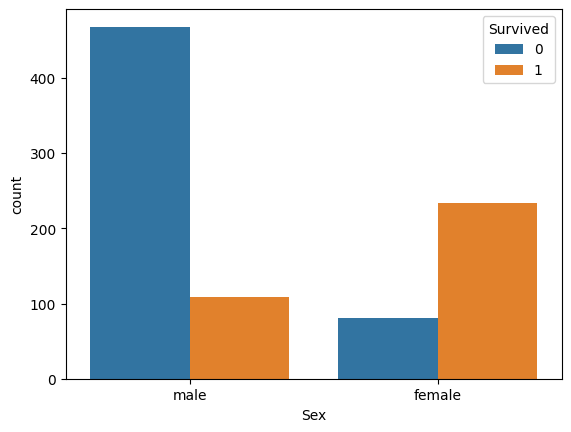

In [ ]:
#nalysing gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

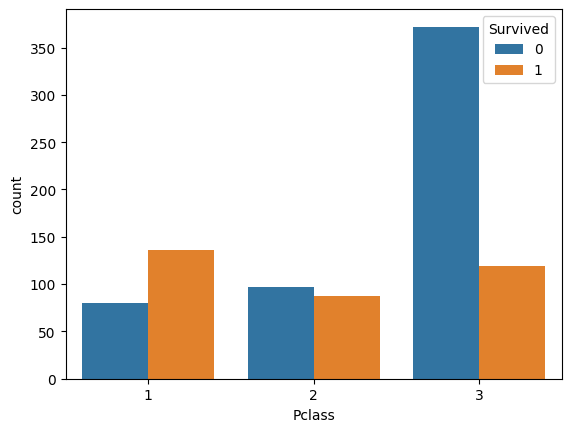

In [ ]:
#count plot for "pclass" column
sns.countplot(x='Pclass', hue='Survived', data=titanic_data) # Change 'survived' to 'Survived'

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

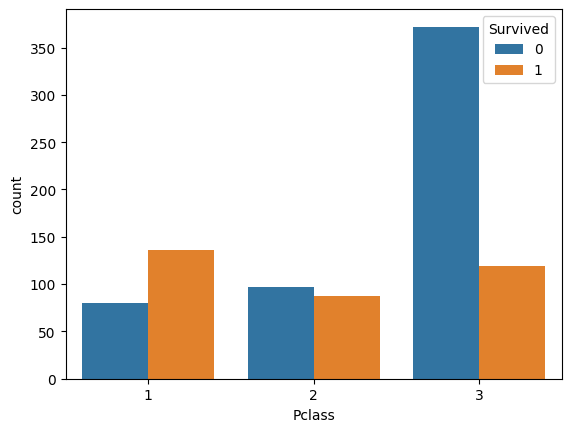

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data) # Change 'survived' to 'Survived'

Encoding the catagorical data

In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1.0


In [ ]:
x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [ ]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500       0.0
1         1    1  38.0      1      0  71.2833       1.0
2         3    1  26.0      0      0   7.9250       0.0
3         1    1  35.0      1      0  53.1000       0.0
4         3    0  35.0      0      0   8.0500       0.0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000       0.0
887       1    1  19.0      0      0  30.0000       0.0
888       3    1   NaN      1      2  23.4500       0.0
889       1    0  26.0      0      0  30.0000       1.0
890       3    0  32.0      0      0   7.7500       2.0

[891 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


split data into test data and train data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


logistical regression and model training

In [ ]:
# Import the necessary class from the sklearn module
from sklearn.linear_model import LogisticRegression

# Now you can create an instance of the LogisticRegression class
model = LogisticRegression()

use the train data on logistic regressio  model


Accuracy: 0.85


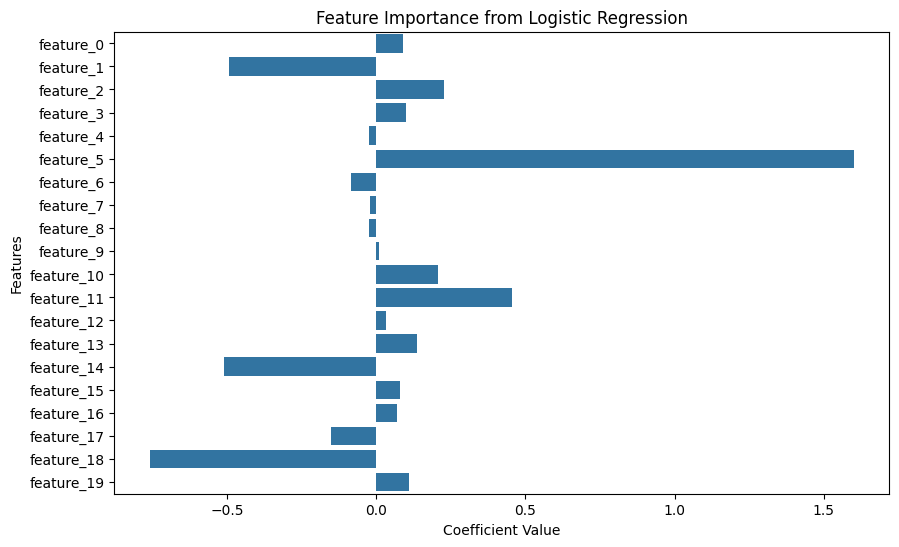

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Ensure y_train is lowercase

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Visualize feature importance (coefficients)
coefficients = model.coef_[0]
features = df.drop('target', axis=1).columns

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


In [ ]:
#evaluating and testing the model

In [ ]:
x_train_prediction = model.predict(X_train)  # Changed x_train to X_train

In [ ]:
print(x_train_prediction)

[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 1 

In [ ]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8825


In [ ]:
#chech accuracy of test data
x_train_prediction = model.predict(X_test)  # Changed x_train to X_train

In [ ]:
print(x_train_prediction)

[1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1]


In [ ]:
test_data_accuracy = accuracy_score(y_test,x_train_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.855


In [ ]:

#ends  # Added '#' to comment out 'ends'
import joblib
joblib.dump(model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
!pip install pyngrok
import subprocess
import os
from pyngrok import ngrok
#setup ngrok
ngrok.set_auth_token("2n3okd9h3afqMkfoiTghhzorFIT_4HygatrymjASrqgiZYHim")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok
# Changed 'popen' to 'Popen' to call the correct subprocess method
proc = subprocess.Popen(["ngrok","http","5000"])

#retrive ngrok's public url here
public_url = ngrok.connect(addr="5000",proto="http")
print("public_URL:",public_url)

public_URL: NgrokTunnel: "https://eb35-35-227-169-165.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
from joblib import load
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML FORM TO TAKE INPUT
    html_form = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Titanic Survival Prediction</title>
    </head>
    <body>
        <h2>Titanic Survival Prediction</h2>
        <form id="prediction_form" method="post" action="/predict">
            <label for="pclass">pclass:</label>
            <input type="text" id="pclass" name="pclass"><br><br>

            <label for="sex">sex (0 for male, 1 for female):</label>
            <input type="text" id="sex" name="sex"><br><br>

            <label for="age">age:</label>
            <input type="text" id="age" name="age"><br><br>

            <label for="sibsp">sibsp:</label>
            <input type="text" id="sibsp" name="sibsp"><br><br>

            <label for="parch">parch:</label>
            <input type="text" id="parch" name="parch"><br><br>

            <label for="fare">fare:</label>
            <input type="text" id="fare" name="fare"><br><br>

            <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
            <input type="text" id="embarked" name="embarked"><br><br>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <p id="prediction_result"></p>

        <script>
            function predictSurvival() {
                var xhr = new XMLHttpRequest();
                var url = "/predict";
                var data = new FormData(document.getElementById("prediction_form"));

                xhr.open("POST", url, true);
                xhr.onreadystatechange = function() {
                    if (xhr.readyState === 4 && xhr.status === 200) {
                        var response = JSON.parse(xhr.responseText);
                        document.getElementById("prediction_result").textContent = "Prediction: " + response.prediction;
                    }
                };
                xhr.send(data);
            }
        </script>
    </body>
    </html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = int(request.form.get('pclass'))
    sex = int(request.form.get('sex'))
    age = float(request.form.get('age'))
    sibsp = int(request.form.get('sibsp'))
    parch = int(request.form.get('parch'))
    fare = float(request.form.get('fare'))
    embarked = int(request.form.get('embarked'))

    # Create a feature vector
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)

    return jsonify({'prediction': prediction[0]})

def run_flask_app():
    # Start the Flask app
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")  # Replace with your actual token
public_url = ngrok.connect(5000).public_url
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: https://f2a0-35-227-169-165.ngrok-free.app


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 11:51:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 11:51:46] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 11:52:39] "POST /predict HTTP/1.1" 500 -
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2552, in __call__
    return self.wsgi_app(environ, start_response)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2532, in wsgi_app
    response = self.handle_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in 